In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,NaN,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	11
float64		column 3	15
float64		column 4	5
float64		column 5	15
float64		column 6	15
float64		column 7	10
float64		column 8	0
float64		column 9	16


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,209.000000,203.000000,199.000000,209.000000,199.000000,199.000000,204.000000,214.000000,198.000000
mean,1.518332,13.394877,2.711809,1.451722,72.666231,0.506080,8.943382,0.175047,0.053889
std,0.003015,0.798129,1.423555,0.488229,0.741649,0.666653,1.417788,0.497219,0.092745
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516530,12.930000,2.195000,1.190000,72.325000,0.145000,8.270000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.370000,72.790000,0.560000,8.605000,0.000000,0.000000
75%,1.519110,13.785000,3.600000,1.630000,73.080000,0.610000,9.142500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.370000


<AxesSubplot:>

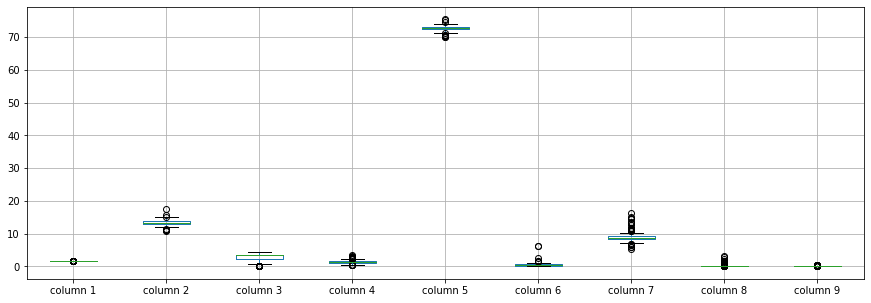

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518332
column 2    13.394877
column 3     2.711809
column 4     1.451722
column 5    72.666231
column 6     0.506080
column 7     8.943382
column 8     0.175047
column 9     0.053889
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.148644,-0.080141,-0.413753,-0.500956,-0.307411,0.809721,0.008114,0.127957
column 2,-0.148644,1.000000,-0.317738,0.122979,-0.141700,-0.252153,-0.283169,0.285377,-0.239660
column 3,-0.080141,-0.317738,1.000000,-0.531700,-0.175051,0.010955,-0.379893,-0.510554,0.095326
column 4,-0.413753,0.122979,-0.531700,1.000000,0.059164,0.324334,-0.258382,0.479788,-0.116372
column 5,-0.500956,-0.141700,-0.175051,0.059164,1.000000,-0.215840,-0.197444,0.035098,-0.063971
column 6,-0.307411,-0.252153,0.010955,0.324334,-0.215840,1.000000,-0.299694,-0.093612,-0.028026
column 7,0.809721,-0.283169,-0.379893,-0.258382,-0.197444,-0.299694,1.000000,-0.112586,0.143803
column 8,0.008114,0.285377,-0.510554,0.479788,0.035098,-0.093612,-0.112586,1.000000,-0.048116
column 9,0.127957,-0.239660,0.095326,-0.116372,-0.063971,-0.028026,0.143803,-0.048116,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+27,9+27+27,9+27+27+27,9+27+27+27+27,9+27+27+27+27+27,9+27+27+27+27,9+27+27+27,9+27+27,9+27,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 95.7782228910006
Epoch: 1 , loss: 95.80067150409405
Epoch: 2 , loss: 95.72503368671124
Epoch: 3 , loss: 95.83284466083234
Epoch: 4 , loss: 95.75604600172777
Epoch: 5 , loss: 96.23359093299278
Epoch: 6 , loss: 95.79940209021935
Epoch: 7 , loss: 95.82007716252254
Epoch: 8 , loss: 96.04464369553786
Epoch: 9 , loss: 95.77020791860727
Epoch: 10 , loss: 96.3467771089994
Epoch: 11 , loss: 96.33712533804086
Epoch: 12 , loss: 95.99358543982872
Epoch: 13 , loss: 95.77914135272687
Epoch: 14 , loss: 95.6103275005634
Epoch: 15 , loss: 95.70468198336087
Epoch: 16 , loss: 96.03755187988281
Epoch: 17 , loss: 96.02388411301833
Epoch: 18 , loss: 95.69717113788312
Epoch: 19 , loss: 95.9892108623798
Epoch: 20 , loss: 96.02192687988281
Epoch: 21 , loss: 96.06019298846905
Epoch: 22 , loss: 95.68589547964243
Epoch: 23 , loss: 95.70281806358925
Epoch: 24 , loss: 95.73244006817157
Epoch: 25 , loss: 95.63713543231671
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.059031,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(285.79145555592606, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2620891646838735

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.490000,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.600000,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.550000,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.690000,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.620000,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.059031,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.000000,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.000000,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.000000,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NL_5(imp).xlsx", index=False, header=False)